<a href="https://colab.research.google.com/github/rokrish18/rokrish18.github.io/blob/master/Machine_Vision_Assignment_2_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # advanced math library 
import matplotlib.pyplot as plt # MATLAB like plotting routines 
import random # for generating random numbers 
import keras 
from keras.datasets import cifar10 # MNIST dataset is included in Keras from keras.models import Sequential # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model from keras.utils import np_utils # NumPy related tools

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


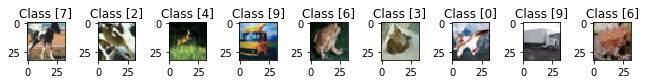

In [28]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

def getClassName(classNumber):
  print(classNumber)
  classNames = ["0 airplane", "1 automobile", "2 bird", "3 cat", "4 deer", "5 dog", "6 frog", "7 horse", "8 ship", "9 truck"]
  return classNames[classNumber[1]];

for i in range(9):
    plt.subplot(1, 9, i+1)
    num = random.randint(0, len(x_test))
    plt.imshow(x_test[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_test[num]))
    
plt.tight_layout()

In [52]:
X_train = x_train.reshape(50000, 3072) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = x_test.reshape(10000, 3072)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

nb_classes = 10 # number of unique digits
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
print("Training matrix output shape", Y_train.shape)
print("Testing matrix output shape", Y_test.shape)

Training matrix shape (50000, 3072)
Testing matrix shape (10000, 3072)
Training matrix output shape (50000, 10)
Testing matrix output shape (10000, 10)


In [53]:
from keras.models import Sequential

def createModel(optimizer):
  model = Sequential()

  model.add(Dense(512, input_shape=(3072,)))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(512))
  model.add(Activation('sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


In [54]:
models = {
    "adam": createModel('adam'),
    "sgd": createModel('sgd'),
    "adadelta": createModel('adadelta'),
    "rmsprop": createModel('rmsprop')
}

print(models)

{'adam': <keras.engine.sequential.Sequential object at 0x7fd892d80ad0>, 'sgd': <keras.engine.sequential.Sequential object at 0x7fd896519750>, 'adadelta': <keras.engine.sequential.Sequential object at 0x7fd898a66dd0>, 'rmsprop': <keras.engine.sequential.Sequential object at 0x7fd89889b690>}


In [55]:
import time
fitHistory = {}
epochs = 100
batch_size = 128

for optimizer in models:
  fitHistory[optimizer] = {}
  model = models[optimizer]

  startTime = time.time()
  fitHistory[optimizer]["history"] = model.fit(X_train, Y_train, 
                                               batch_size=batch_size, epochs=epochs, verbose=2, 
                                               callbacks = [keras.callbacks.ModelCheckpoint( './', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')])
  endTime = time.time()
  fitHistory[optimizer]["runtime"] = endTime - startTime
  print("##################")
  print("##################")
  print("##################")

print(fitHistory)

Epoch 1/100
391/391 - 8s - loss: 1.9396 - accuracy: 0.2971
Epoch 2/100
391/391 - 8s - loss: 1.7513 - accuracy: 0.3690
Epoch 3/100
391/391 - 8s - loss: 1.6846 - accuracy: 0.3941
Epoch 4/100
391/391 - 8s - loss: 1.6387 - accuracy: 0.4081
Epoch 5/100
391/391 - 8s - loss: 1.6073 - accuracy: 0.4245
Epoch 6/100
391/391 - 8s - loss: 1.5772 - accuracy: 0.4335
Epoch 7/100
391/391 - 8s - loss: 1.5549 - accuracy: 0.4420
Epoch 8/100
391/391 - 8s - loss: 1.5297 - accuracy: 0.4509
Epoch 9/100
391/391 - 8s - loss: 1.5142 - accuracy: 0.4563
Epoch 10/100
391/391 - 8s - loss: 1.4981 - accuracy: 0.4654
Epoch 11/100
391/391 - 8s - loss: 1.4849 - accuracy: 0.4666
Epoch 12/100
391/391 - 8s - loss: 1.4634 - accuracy: 0.4755
Epoch 13/100
391/391 - 8s - loss: 1.4510 - accuracy: 0.4808
Epoch 14/100
391/391 - 8s - loss: 1.4458 - accuracy: 0.4824
Epoch 15/100
391/391 - 8s - loss: 1.4295 - accuracy: 0.4861
Epoch 16/100
391/391 - 8s - loss: 1.4227 - accuracy: 0.4868
Epoch 17/100
391/391 - 8s - loss: 1.4086 - accura

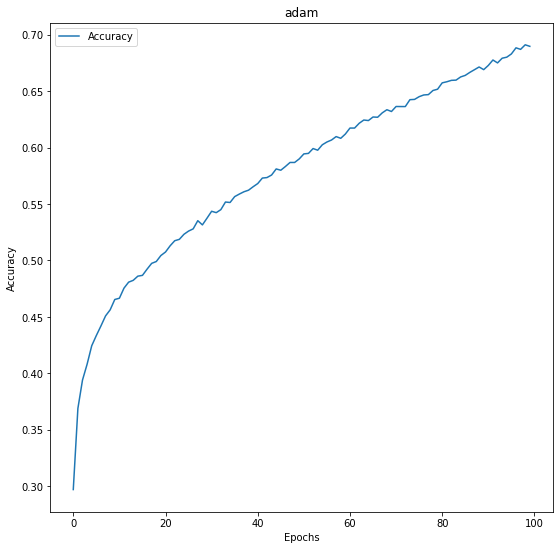

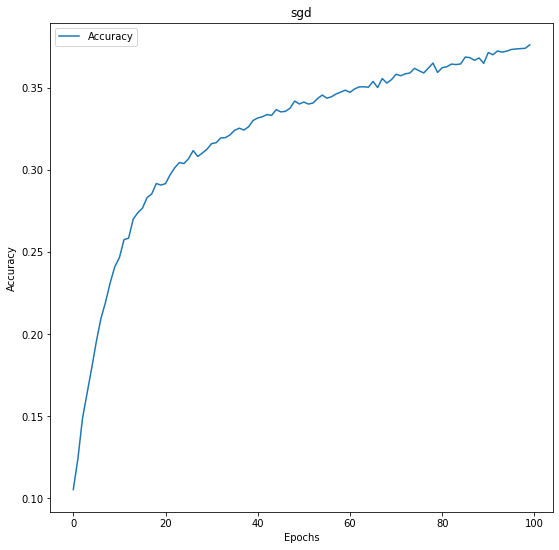

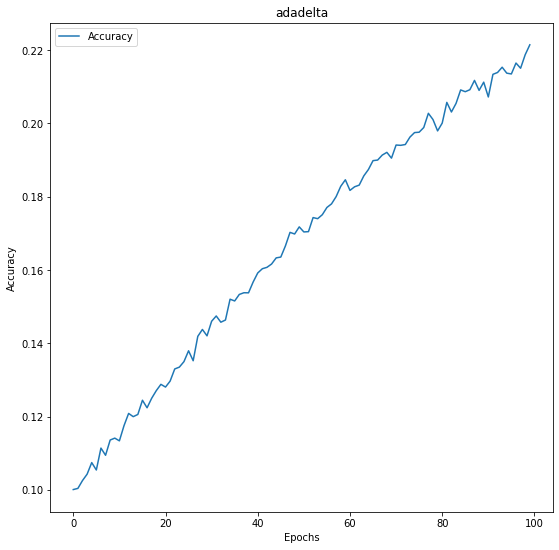

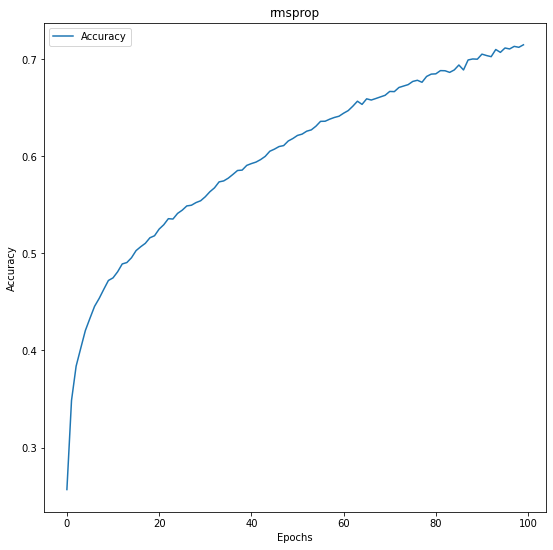

In [56]:
for optimizer in fitHistory:
  plt.plot(fitHistory[optimizer]["history"].history['accuracy'], label='Accuracy')
  plt.legend()
  plt.title(optimizer)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.savefig('model_training_history')
  plt.show()

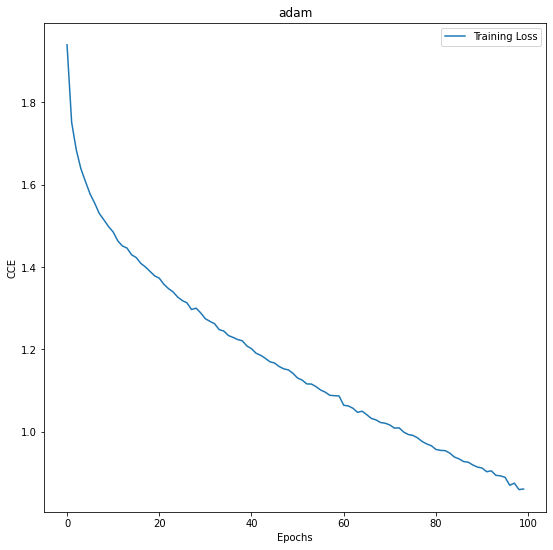

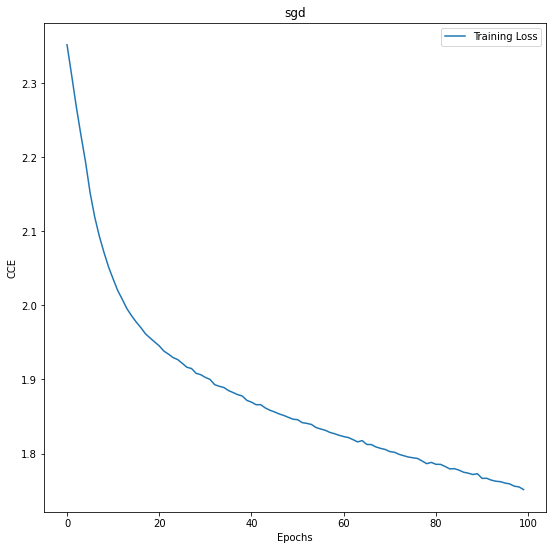

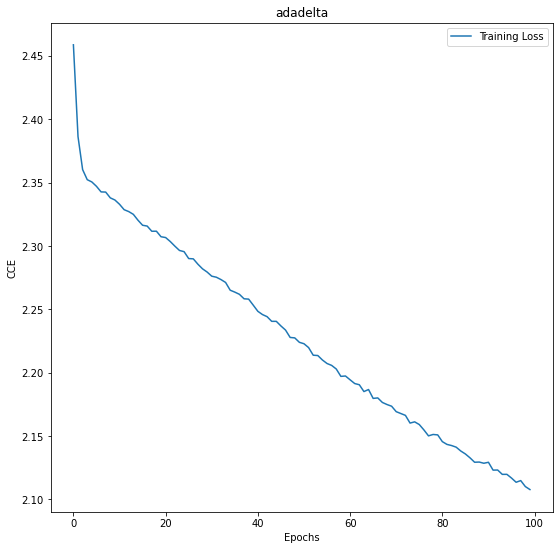

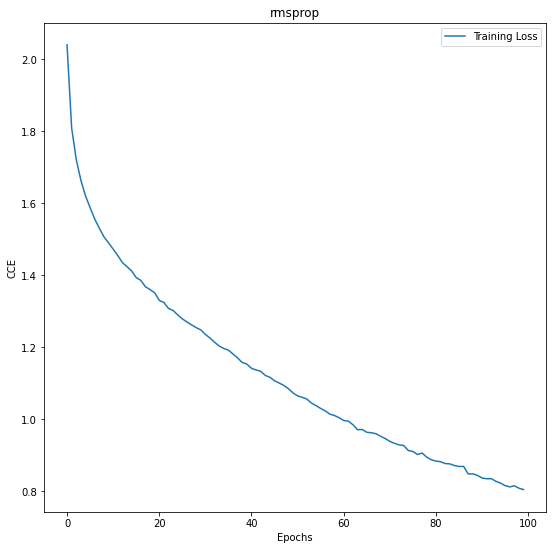

In [57]:
for optimizer in fitHistory:
  plt.plot(fitHistory[optimizer]["history"].history['loss'], label='Training Loss')
  plt.title(optimizer)
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('CCE')
  plt.savefig('model_training_history')
  plt.show()

In [58]:
for optimizer in models:
  model = models[optimizer]
  score = model.evaluate(X_test, Y_test)
  print(optimizer, 'Test score:', score[0])
  print(optimizer, 'Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 1.3329 - accuracy: 0.5457
adam Test score: 1.3329107761383057
adam Test accuracy: 0.5457000136375427
313/313 [==============================] - 1s 4ms/step - loss: 1.7148 - accuracy: 0.3939
sgd Test score: 1.7148452997207642
sgd Test accuracy: 0.3939000070095062
313/313 [==============================] - 1s 4ms/step - loss: 2.0595 - accuracy: 0.3061
adadelta Test score: 2.059504508972168
adadelta Test accuracy: 0.3061000108718872
313/313 [==============================] - 2s 5ms/step - loss: 1.4718 - accuracy: 0.5469
rmsprop Test score: 1.471840500831604
rmsprop Test accuracy: 0.5468999743461609


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test),axis=1)#model.predict(X_test)
#print(Y_test)
new_Y_test = np.argmax(Y_test,axis=1)
print(predicted_classes)
print(new_Y_test)
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
#print(correct_indices)
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
cm=tf.math.confusion_matrix(new_Y_test,predicted_classes)
import seaborn as sns
# Make predictions
#y_pred = model.predict(X_test)

# Build confusion metrics
#cm = confusion_matrix(y_true=Y_test, y_pred=predicted_classes)
#print(cm)

# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
#ax.xaxis.set_ticklabels(['ham', 'spam'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
#ax.yaxis.set_ticklabels(['spam', 'ham'], fontsize = 15)
plt.show()